In [1]:
import torch
from torch import nn, optim
from torch.autograd import grad
import numpy as np
import utils

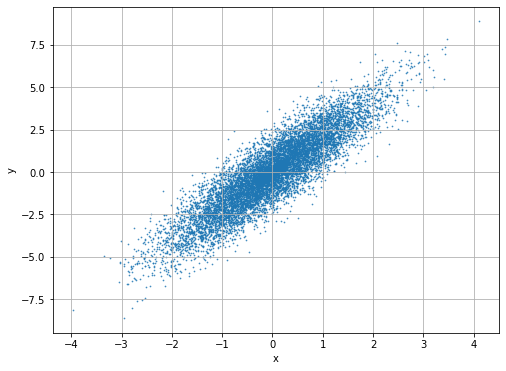

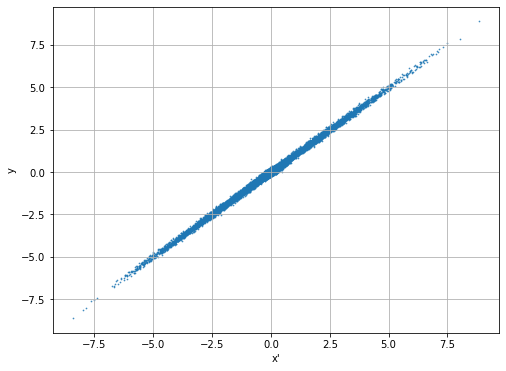

In [2]:
k = 2.0
sample = [utils.generate(s=1.0, t=0.1, k=k), utils.generate(s=0.1, t=0.1, k=k)]

x1, y1 = sample[0]
x2, y2 = sample[1]
x1, y1 = x1.numpy(), y1.numpy()
x2, y2 = x2.numpy(), y2.numpy()
x_data = np.concatenate([x1, x2], axis=0)
y_data = np.concatenate([y1, y2], axis=0)

utils.draw_dataset(x_data[:, [0]], y_data, x_label="x", filename='./figure/traditional_distribution_x_value.png')
utils.draw_dataset(x_data[:, [1]], y_data, x_label="x'", filename='./figure/traditional_distribution_x_prime.png')

$\alpha>0,\beta=0$

----- Epoch 5000 -----
Loss: 1.0244024991989136
Slope: 1.9956578016281128
----- Epoch 10000 -----
Loss: 1.0244026184082031
Slope: 1.995678186416626


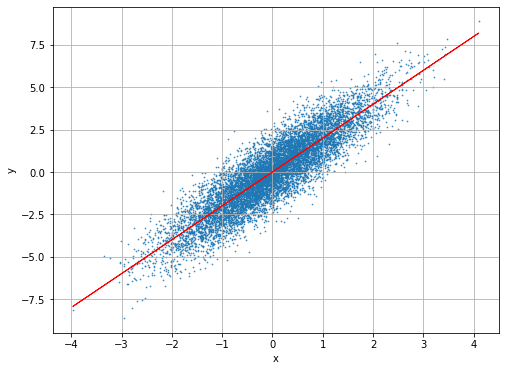

In [3]:
slope = nn.Parameter(torch.Tensor([[1.0]]))
optimizer = optim.SGD([slope], lr=1e-3)
function = nn.MSELoss(reduction='mean')

for epoch in range(1, 10001):
    loss = 0
    for x, y in sample:
        p = torch.randperm(len(x))
        x, y = x[p], y[p]
        loss += function(x[:, [0]] @ slope, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5000 == 0:
        print('----- Epoch {} -----'.format(epoch))
        print('Loss: {}'.format(loss.item()))
        print('Slope: {}'.format(slope.item()))

k = slope.detach().numpy()[0, 0]
utils.draw_regression(x_data[:, [0]], y_data, k, filename='./figure/traditional_regression_real.png')

$\alpha=0,\beta>0$

----- Epoch 5000 -----
Loss: 0.01996424049139023
Slope: 0.9956846237182617
----- Epoch 10000 -----
Loss: 0.019964244216680527
Slope: 0.9956846237182617


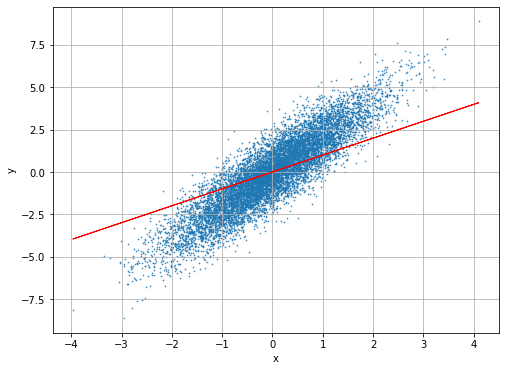

In [4]:
slope = nn.Parameter(torch.Tensor([[1.0]]))
optimizer = optim.SGD([slope], lr=1e-3)
function = nn.MSELoss(reduction='mean')

for epoch in range(1, 10001):
    loss = 0
    for x, y in sample:
        p = torch.randperm(len(x))
        x, y = x[p], y[p]
        loss += function(x[:, [1]] @ slope, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5000 == 0:
        print('----- Epoch {} -----'.format(epoch))
        print('Loss: {}'.format(loss.item()))
        print('Slope: {}'.format(slope.item()))

k = slope.detach().numpy()[0, 0]
utils.draw_regression(x_data[:, [0]], y_data, k, filename='./figure/traditional_regression_fake.png')

$\alpha>0,\beta>0$

----- Epoch 5000 -----
Loss: 0.023706747218966484
Alpha: 0.17271681129932404
Beta: 0.9251658916473389
----- Epoch 10000 -----
Loss: 0.01983446441590786
Alpha: 0.05767692252993584
Beta: 0.9724671244621277
----- Epoch 15000 -----
Loss: 0.01972406730055809
Alpha: 0.03825797140598297
Beta: 0.9804511070251465
----- Epoch 20000 -----
Loss: 0.019720911979675293
Alpha: 0.034980714321136475
Beta: 0.9818002581596375


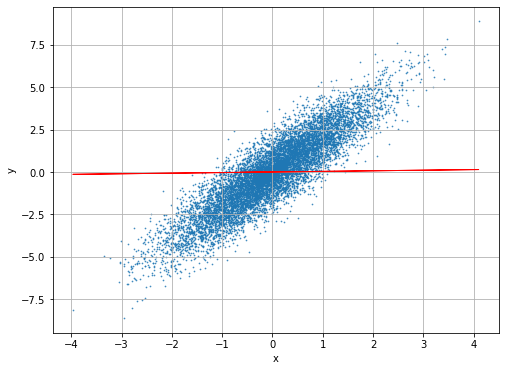

In [5]:
alpha = nn.Parameter(torch.Tensor([[1.0]]))
beta = nn.Parameter(torch.Tensor([[1.0]]))
optimizer = optim.SGD([alpha, beta], lr=1e-3)
function = nn.MSELoss(reduction='mean')

for epoch in range(1, 20001):
    loss = 0
    for x, y in sample:
        p = torch.randperm(len(x))
        x, y = x[p], y[p]
        loss += function(x[:, [0]] @ alpha + x[:, [1]] @ beta, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 5000 == 0:
        print('----- Epoch {} -----'.format(epoch))
        print('Loss: {}'.format(loss.item()))
        print('Alpha: {}'.format(alpha.item()))
        print('Beta: {}'.format(beta.item()))

k = alpha.detach().numpy()[0, 0]
utils.draw_regression(x_data[:, [0]], y_data, k, filename='./figure/traditional_regression_mixed.png')